In [1]:
#SCRIPT TO CREATE THE AUTOMATION FUNCTION
from tools import *

In [2]:
csv =pd.read_csv(r"C:\Users\cjang.WILDCAT\Desktop\eis\test", names = ['name', 'recal_indices', 'mask_choice'],index_col = 0, sep = " ", header = None)

In [26]:
len(csv)

8

In [4]:
mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[1].name])

0


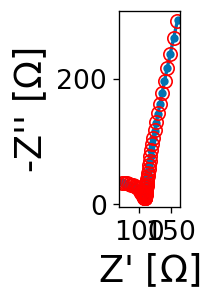

file     fit_Rs      fit_R1    fit_n1  fit_fs1    fit_Q1  \
0  DE_40_10_60.mpt  38.076706  120.933885  0.901253      NaN  0.000005   

     fit_R2    fit_n2  fit_fs2        fit_Q2        fit_Q3    fit_n3  
0  71.20524  0.961164      NaN  4.197309e-09  9.267430e-07  0.986649  
1
['0']
[0]


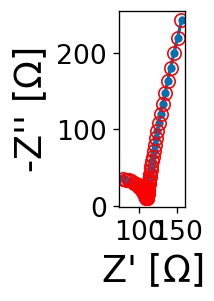

file     fit_Rs      fit_R1    fit_n1  fit_fs1    fit_Q1  \
0  DE_40_11_60.mpt  40.748915  143.057242  0.875946      NaN  0.000005   

      fit_R2  fit_n2  fit_fs2        fit_Q2        fit_Q3    fit_n3  
0  69.040747     1.0      NaN  2.349150e-09  7.512881e-07  0.999999  
2
['3', '2', '1', '0']
[3, 2, 1, 0]


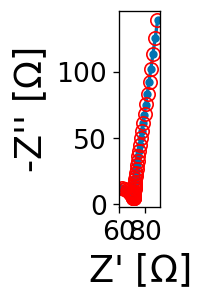

file     fit_Rs     fit_R1    fit_n1  fit_fs1    fit_Q1  \
0  DE_40_12_60.mpt  47.155965  28.866797  0.920766      NaN  0.000009   

      fit_R2  fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  24.018721     1.0      NaN  7.992755e-09  0.000001  0.999095  
3


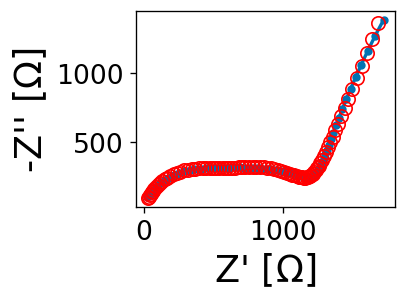

file    fit_Rs      fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_49_5_30.mpt  0.026666  634.242985  0.825182      NaN  1.666474e-07   

       fit_R2    fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  539.429273  0.888724      NaN  9.896210e-09  0.000006  0.766019  
4


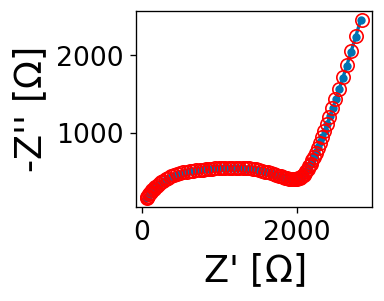

file    fit_Rs       fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_49_6_30.mpt  0.063423  1476.305134  0.700253      NaN  2.451403e-07   

       fit_R2    fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  600.050342  0.896536      NaN  7.482458e-09  0.000004  0.804293  
5


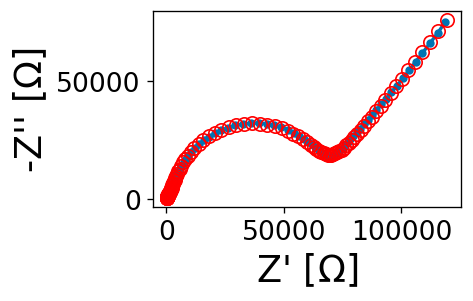

file    fit_Rs        fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_49_7_30.mpt  0.091087  59262.099527  0.976298      NaN  3.115628e-09   

        fit_R2    fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  2621.229991  0.717345      NaN  6.892520e-08  0.000001  0.586167  
6


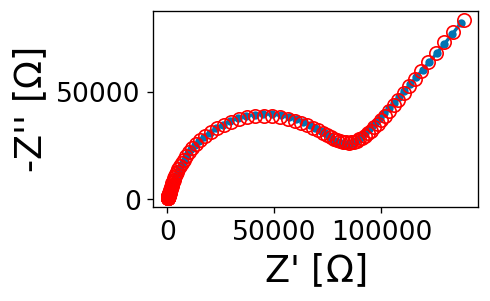

file    fit_Rs        fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_49_8_30.mpt  0.079689  71714.374892  0.946959      NaN  3.562437e-09   

          fit_R2    fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  121492.774229  0.949676      NaN  7.590797e-07  0.000002  0.483177  
7


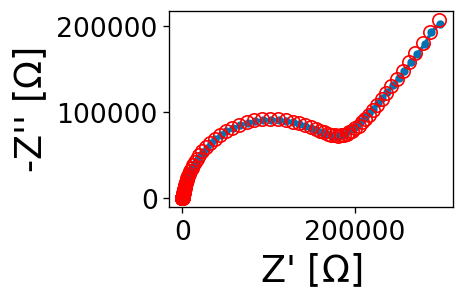

file    fit_Rs        fit_R1    fit_n1  fit_fs1    fit_Q1  \
0  DE_49_9_30.mpt  0.034478  746727.30233  0.766578      NaN  0.000999   

          fit_R2    fit_n2  fit_fs2        fit_Q2        fit_Q3    fit_n3  
0  159177.388422  0.969645      NaN  2.196741e-09  3.336345e-07  0.620581  


In [27]:
#AUTO FUNCTION
import logging
logging.getLogger().setLevel(logging.CRITICAL)
import math
for i in range(len(csv)):
    print(i)
    mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name])
    #print(mpt.data)
    if len((csv.iloc[i].mask_choice.strip('[')).strip('];')) == 1:
        mask_choice = mpt.fast_mask()
        masked_mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
        #print(len(masked_mpt.df[0]))
        if (csv.iloc[i].mask_choice.strip('[')).strip('];') == "1":
            if type((csv.iloc[i].recal_indices)) == str:
                #print(csv.iloc[i].recal_indices)
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                #print(edited_inds)
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:      
                        if ind in masked_mpt.df[0].index:  
                            masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                        else:
                            continue
                #print(len(masked_mpt.df[0]))
            else:
                #print('guessing...')
                continue
            print(masked_mpt.guesser())
        elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "2":
            mask_choice = mpt.masker0()
            masked_mpt = mpt_data(path =  r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
            if type((csv.iloc[i].recal_indices)) == str:
                #print(csv.iloc[i].recal_indices)
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                #print(edited_inds)
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:      
                        if ind in masked_mpt.df[0].index:  
                            masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                        else:
                            continue
                #print(len(masked_mpt.df[0]))
            else:
                #print('guessing...')
                continue
            print(masked_mpt.guesser())
        elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "3":
            mask_choice = mpt.masker()
            masked_mpt = mpt_data(path =  r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
            if type((csv.iloc[i].recal_indices)) == str:
                #print(csv.iloc[i].recal_indices)
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                #print(edited_inds)
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:      
                        if ind in masked_mpt.df[0].index:  
                            masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                        else:
                            continue
                #print(len(masked_mpt.df[0]))
            else:
                #print('guessing...')
                continue
            print(masked_mpt.guesser())
        elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "4":
            if type((csv.iloc[i].recal_indices)) == str:
                #print(csv.iloc[i].recal_indices)
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                #print(edited_inds)
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:      
                        if ind in masked_mpt.df[0].index:  
                            mpt.df[0] = mpt.df[0].drop(ind,axis=0)
                        else:
                            continue
                #print(len(masked_mpt.df[0]))
            else:
                #print('guessing...')
                continue
            print(mpt.guesser())
            print('here')
        else:
            print('bad masking choice')
    else:
        #print([str(i) for i in (csv.iloc[i].mask_choice.strip('[')).strip('];').split(',')])
        raw_window = [str(i) for i in (csv.iloc[i].mask_choice.strip('[')).strip('];').split(',')]
        #print(mpt.window_masker([raw_window[0],raw_window[1]], [raw_window[2],raw_window[3]]))
        mask_choice = mpt.window_masker([float(raw_window[0]),float(raw_window[1])], [float(raw_window[2]),float(raw_window[3])])
        masked_mpt = mpt_data(path =  r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
        #print((str(csv.iloc[i].recal_indices).strip('[')).strip(']'))
        if (str(csv.iloc[i].recal_indices).strip('[')).strip(']') != 'nan':
            pre_inds =(str(csv.iloc[i].recal_indices).strip('[')).strip(']').split(',') 
            print(pre_inds)
            edited_inds = [int(i) for i in pre_inds]
            print(edited_inds)
            for ind in edited_inds:
                if ind == "[":
                    continue
                elif ind == "]":
                    continue
                else:      
                    if ind in masked_mpt.df[0].index:  
                        masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                    else:
                        continue
            print(masked_mpt.guesser())
        else:
            print(masked_mpt.guesser())

In [7]:
(csv.iloc[0].recal_indices)

nan